# Harmonic Fields Testing Notebook

In this notebook, the `harmonicfields` class within PENTrack is tested. 

In [17]:
# in test_functions.py there are some useful python functions 
# and package imports
from test_functions import *

# if you use your own separate scripts with function definitions
# these commands make your notebook grab updates from those script
# files every time you run a code cell in the notebook. saves time.
%load_ext autoreload
%autoreload 2
plt.rcParams['figure.dpi'] = 200

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
# might not be necessary, but sometimes we need to take care to be in the right directory
# !cd /ucn/orithyia_data/jberean2/PENTracktest/HarmonicFieldTest

/bin/sh: line 0: cd: /ucn/orithyia_data/jberean2/PENTracktest/HarmonicFieldTest: No such file or directory


In [22]:
!pwd

/ucn/orithyia_data/jberean2/PENTrack/test/HarmonicFieldTest


# About the Harmonic Fields Implementation

This desire to develop such an implementation is described in detail in [Magnetic-field uniformity in neutron electric-dipole-moment experiments](https://journals.aps.org/pra/abstract/10.1103/PhysRevA.99.042112). The same notational conventions are used here, and in Wolfgang Klassen's (unreleased at the time of writing this notebook) work on magnetometer placement within an nEDM apparatus.

Following from Maxwell's equations for magnetostatics, and Laplace's equation, the magnetic field can be written as

\begin{align*}
    \vec{B}(\vec{r}) = \sum_{l, m} G_{l,m} \begin{pmatrix} \Pi_{x, l, m}(\vec{r}) \\ 
    \Pi_{y, l, m}(\vec{r}) \\ \Pi_{z, l, m}(\vec{r}) \end{pmatrix}
\end{align*}
    
where $\Pi_{x, l, m} = \partial_x \Phi_{l+1, m}$, etc. $\Phi_{l,m}$ are the basis functions of the scalar potential, thus making $\Pi$ the basis functions of the magnetic field itself. $\Phi_{l+1, m}$ consist of Legendre polynomials of the first and second kind, the full formalism is described in the paper linked above. Within PENTrack, these expressions have been hard-coded, within cartesian coordinates. See the `harmonicfields.cpp` file for documentation of the code. Below is a an excerpt, to provide some flavour for how this was carried out:

```cpp
// COMPUTING B

B[0] = 	  G[2] 	\
        + G[3]  * (y) \
        + G[5]  * (-x / 2) \
        + G[6]  * (z) \
        + G[7]  * (x) \
        + G[8]  * (2 * x * y) \
        + G[9]  * (2 * y * z) \
        + G[10] * (-x * y / 2) \
        + G[11] * (-x * z) \
        + G[12] * (-(3 * pow(x,2) + pow(y,2) - 4 * pow(z,2)) / 4) \
        + G[13] * (2 * x * z) \
        + G[14] * ((pow(x,2) - pow(y,2))) \
        + G[15] * ((3 * pow(x,2) * y - pow(y,3))) \
        + G[16] * (6 * x * y * z) \
        + G[17] * (-(3 * pow(x,2) * y + pow(y,3) - 6 * y * pow(z,2)) / 2) \
        + G[18] * (-(3 / 2) * (x * y * z)) \
        + G[19] * ((3 / 8) * (pow(x,3) + x * pow(y,2) - 4 * x * pow(z,2))) \
        + G[20] * ((-1 / 4) * (9 * pow(x,2) * z + 3 * pow(y,2) * z - 4 * pow(z,3))) \
        + G[21] * (-pow(x,3) + 3 * x * pow(z,2)) \
        + G[22] * (3 * (pow(x,2) * z - pow(y,2) * z)) \
        + G[23] * (pow(x,3) - 3 * x * pow(y,2));

B[1] =	  G[0] 	\
        + G[3]  * (x) \
        + G[4]  * (z) \
        + G[5]  * (-y / 2) \
        + G[7]  * (-y) \
        + G[8]  * (pow(x,2) - pow(y,2)) \
        + G[9]  * (2 * x * z) \
        + G[10] * ((pow(x,2) + 3 * pow(y,2) - 4 * pow(z,2)) / 4) \
        + G[11] * (-y * z) \
        + G[12] * (-x * y / 2) \
        + G[13] * (-2 * y * z) \
        + G[14] * (-2 * x * y) \
        + G[15] * (pow(x,3) - 3 * x * pow(y,2)) \
        + G[16] * (3 * (pow(x,2) * z - pow(y,2) * z)) \
        + G[17] * (-(pow(x,3) + 3 * x * pow(y,2) - 6 * x * pow(z,2)) / 2) \
        + G[18] * ( (-1 / 4) * (3 * pow(x,2) * z + 9 * pow(y,2) * z - 4 * pow(z,3))) \
        + G[19] * ((3 / 8) * (pow(x,2) * y + pow(y,3) - 4 * y * pow(z,2))) \
        + G[20] * ((-3 / 2) * x * y * z) \
        + G[21] * (-3 * y * pow(z,2) + pow(y,3)) \
        + G[22] * (-6 * x * y * z) \
        + G[23] * (-3 * pow(x,2) * y + pow(y,3));

B[2] =	  G[1] 	\
        + G[4]  * (y) \
        + G[5]  * (z) \
        + G[6]  * (x) \
        + G[9]  * (2 * x * y) \
        + G[10] * (2 * y * z) \
        + G[11] * (pow(z,2) - (1 / 2) * (pow(x,2) + pow(y,2))) \
        + G[12] * (2 * x * z) \
        + G[13] * (pow(x,2) - pow(y,2)) \
        + G[16] * (3 * pow(x,2) * y - pow(y,3))\
        + G[17] * (6 * x * y * z)  \
        + G[18] * (3 * y * pow(z,2) - (3/4) * (pow(x,2) * y + pow(y,3))) \
        + G[19] * (pow(z,3) - (3 / 2) * z * (pow(x,2) + pow(y,2))) \
        + G[20] * (3 * x * pow(z,2) - (3/4) * (pow(x,3) + x * pow(y,2))) \
        + G[21] * (3 * (pow(x,2) * z - pow(y,2) * z)) \
        + G[22] * (pow(x,3) - 3 * x * pow(y,2));
```

In PENTrack, the implementation of these fields goes up to third order. The user must give values for every $G_{l,m}$ parameter, to be used in generating the field, and its derivatives values. The derivative values, for $\partial_{x_i}B_{x_i}$ are hard-coded in a simalar fashion.

# Making a New Class in PENTrack

This notebook isn't really about the structural changes necessary for adding classes to PENTrack, however I would direct the reader towards a [specific git commit (abd1a0929c50c74549ea7fc1449ee8d9ac895fa1)](https://github.com/jonahberean/PENTrack/commit/abd1a0929c50c74549ea7fc1449ee8d9ac895fa1) regarding this topic. In this commit one can see generally what sort of changes to the PENTrack base code are necessary for implementing a new class. 

# About Rotations and Offsets

Offsets are implemented straightforwardly, by simply shifting the location at which each field value is calculated, each time PENTrack requests a field value. 

Rotations make use of BOOST's quaternion class. Each rotation is parameterized by an axis about which to rotate, and an angle through which to rotate. 

>![](axis_angle.png)
>![](jonahberean/PENTrack/test/HarmonicFieldTest/axis_angle.png)

A rotation through an angle $\theta$, around the axis defined by the unit vector

\begin{align*}
    \vec{u} = (u_x, u_y, u_z) = u_x \mathbf{i} + u_y \mathbf{j} + u_z \mathbf{k}
\end{align*}

can be represented by a quaternion. 

The quaternion representation of the rotation is as follows:

\begin{align*}
    \mathbf{q} = e^{\frac{\theta}{2} \left ( u_x \mathbf{i} + u_y \mathbf{j} + u_z \mathbf{k}\right )} = \cos{\frac{\theta}{2}} + \left ( u_x \mathbf{i} + u_y \mathbf{j} + u_z \mathbf{k}\right )\sin{\frac{\theta}{2}}
\end{align*}

The desired rotation can be applied to any ordinary vector, $\vec{p} = \left ( p_x, p_y, p_z \right )$, in 3-dimensional space, by representing that vector as a quaternion with a real (first) coordinate equal to zero. The rotation operation is to evaluate the conjugate of $\mathbf{p}$ and $\mathbf{q}$:

\begin{align}
    \mathbf{p'} = \mathbf{qpq'}
\end{align}

The latter three elements of the $\mathbf{p'}$ quaternion correspond to the 3-dimensional, rotated vector. 

The same quaternion, $\mathbf{q}$ can be used to \textit{conjugate} quaternions constructed from the gradient vectors of the components of $\vec{B}$. The resulting, rotated gradient vectors contain each of the derivative components, $\partial_{x_j} B_i$, as required. Here's a [useful stack exchange post discussing this approach](https://math.stackexchange.com/questions/1179818/gradient-in-a-rotated-reference-frame}).

Again, the reader is referred to the `harmonicfields.cpp` file for more detailed documentation. Here is an excerpt (full of print statements used in debugging):

```cpp
// ROTATION OF B

// construct the quarternion, p, which represents the vector to be rotated
// here the 0th component is equal to zero, and the remaining three 
// components are those of the earlier computed magnetic field

// std::cout << std::endl;
// std::cout << std::endl;
// std::cout << "Rotation of B - Testing" << std::endl;

boost::math::quaternion<double> p(0, B[0], B[1], B[2]);

// std::cout << "qua. p, of vector B to be rotated: " << p << std::endl;

// the components of the axis of rotation (member variables of this class)
// are used to construct a normalized vector.

// std::cout << "rot. axis - x:" << axis_x << std::endl;
// std::cout << "rot. axis - y:" << axis_y << std::endl;
// std::cout << "rot. axis - z:" << axis_z << std::endl;

boost::numeric::ublas::vector<double> axis(3, 0);
axis(0) = axis_x;
axis(1) = axis_y;
axis(2) = axis_z;

// std::cout << "rot. axis (boost vector) - x:" << axis(0) << std::endl;
// std::cout << "rot. axis (boost vector) - y:" << axis(1) << std::endl;
// std::cout << "rot. axis (boost vector) - z:" << axis(2) << std::endl;

// the rotational axis vector is normalized
axis = (axis / boost::numeric::ublas::norm_2(axis));

// std::cout << "rot. axis (norm. boost vector) - x:" << axis(0) << std::endl;
// std::cout << "rot. axis (norm. boost vector) - y:" << axis(1) << std::endl;
// std::cout << "rot. axis (norm. boost vector) - z:" << axis(2) << std::endl;

// angle through which to rotate
// std::cout << "angle through which to rotate" << angle << std::endl;

// calculate quarternion, q, whih represents the rotation
boost::math::quaternion<double> q(cos(angle / 2), 
                                  sin(angle / 2) * axis(0), 
                                  sin(angle / 2) * axis(1), 
                                  sin(angle / 2) * axis(2));

// std::cout << "quarternion, q, of the rotation: " << q << std::endl;

// get the conjugate of the quaternion, q'
boost::math::quaternion<double> q_prime = conj(q);

// std::cout << "conj qua., q', of the rotation: " << q_prime << std::endl;

// perform multiplication to rotate
boost::math::quaternion<double> p_prime = q * p * q_prime;

// std::cout << "quarternion, p', after rotation: " << p_prime << std::endl;

// extract the resulting vector components, post-rotation
B[0] = p_prime.R_component_2();
B[1] = p_prime.R_component_3();
B[2] = p_prime.R_component_4();

// std::cout << "x-comp of p' = B_x = " << B[0] << std::endl;
// std::cout << "y-comp of p' = B_y = " << B[1] << std::endl;
// std::cout << "z-comp of p' = B_z = " << B[2] << std::endl;
```

# Making Cuts through Simulated Fields - PENTrack

In the `test/HarmonicFieldTest` driectory, there is a testing suite that generates cuts through various magnetic fields. The fields are generated using the new `harmonicfields` class. This notebook and its associated functions **was designed to be placed within the `test/HarmonicFieldTest` directory, it must be placed there for the code blocks below to function correctly.**

Also, **the code below relies on the root files generated by running the `PENTrack/test/HarmonicFieldTest/RunTest.sh` script from within the `PENTrack/test/HarmonicFieldTest/` directory, please ensure this has been done before continuing.**

In [23]:
# This make a new dictionary to hold the data loaded from root files.
B_dict = {}

# Uniform Fields

PENTrack simulates a cut through a generated magnetic field according to a plane defined by the user inputs. The user provides the coordinates of three points in 3-D space, and the number points along each direction on the plane that define the grid. For each of the test examples in this notebook the plane input values are provides, and the plane is plotted.

The first cut plane, used in this section on **Uniform Fields** is:
```bash
#         (x0, y0, z0) (x1, y1, z1) (x2, y2, z2) NumPoints1 NumPoints2
BCutPlane  0   0   0    1   0   0    0   1   0   100        100
```

Making uniform fields using the harmonic polynomial formalism involves setting just the first three $G_{l,m}$ parameters to be non-zero, i.e.

\begin{aligned} G_{0,-1} &=B_{x} \\ G_{0,0} &=B_{z} \\ G_{0,1} &=B_{y} \end{aligned}

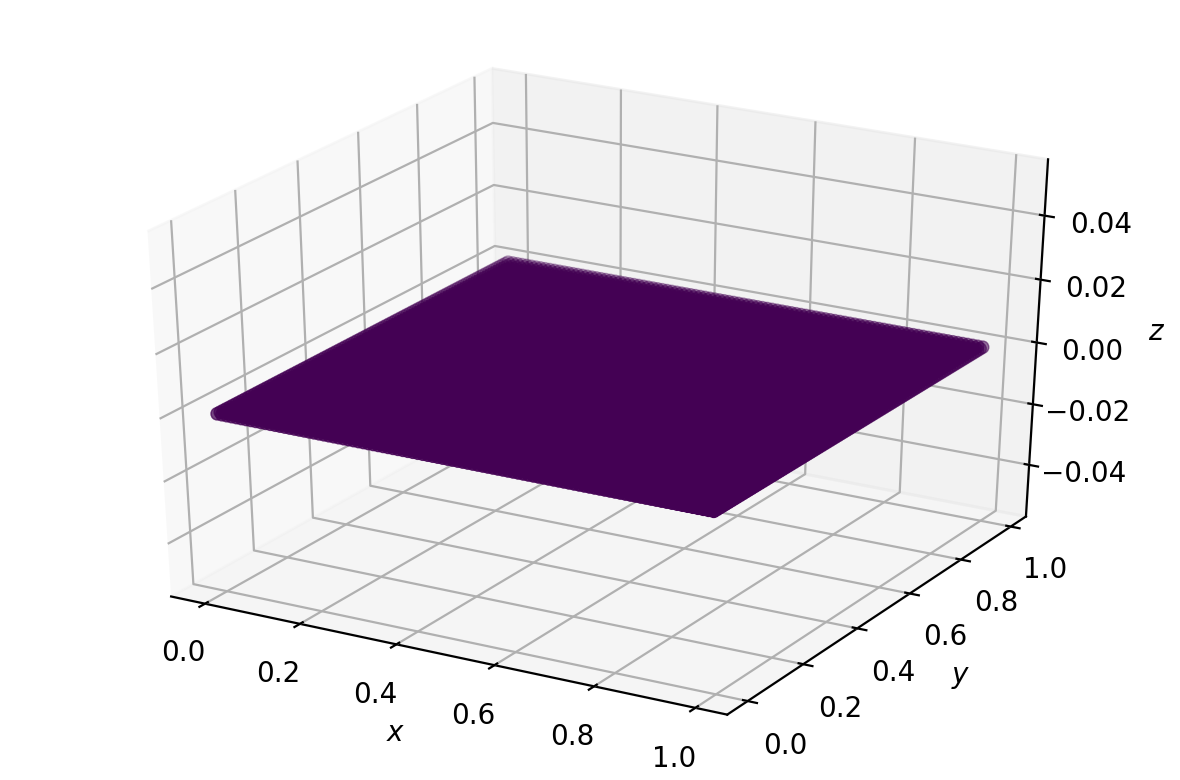

In [25]:
B_dict = load_root(B_dict, 'B0z.out.root')
plot_3D_surf(B_dict, 'B0z.out.root', 'x', 'y', 'z')

## Uniform $B_0$ Field in the $z$-direction

Every $G_{l,m}$ value must be given as input when using the `harmonicfields` class. For this case, the only non-zero $G_{l,m}$ value given is:

$$G_{0,0} = B_z = 0$$

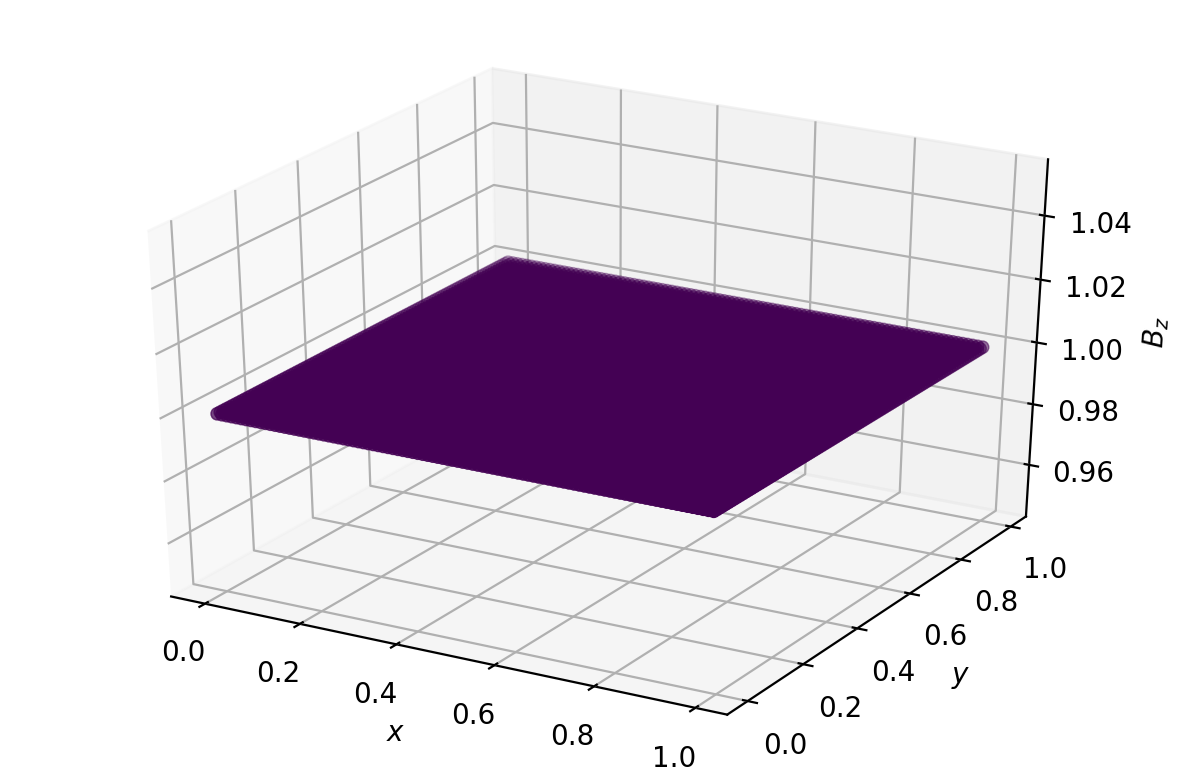

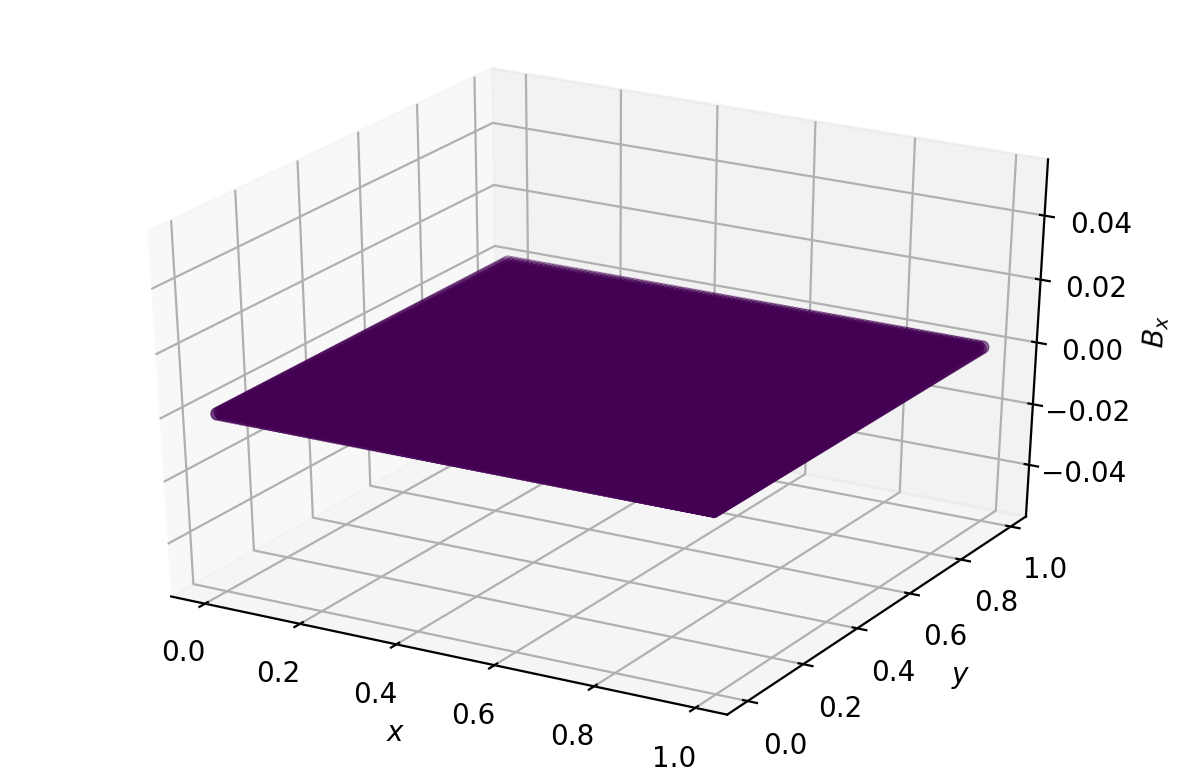

In [26]:
plot_3D_surf(B_dict, 'B0z.out.root', 'x', 'y', 'Bz')
plot_3D_surf(B_dict, 'B0z.out.root', 'x', 'y', 'Bx')

This is a simple demonstration of the $B_0$ field in the $z$-direction. We see a field that is constant in the plane as expected.

# Offsets and Rotations of Uniform Fields

Here we use the same plane as in the above section ($z=0$, just the $x$-$y$ plane), and the same field (uniform $B_z=1$, $B_x=0=B_y$) and try an offset, then a rotation.

## Offset of a Uniform Field

If you think about this one for a moment, it doesn't make sense. Any offset to a perfectly uniform field will yield the same field. We skip this one.

## Rotation of a Uniform Field

We'll do a rotation by $\pi/4$ about the $y$-axis.

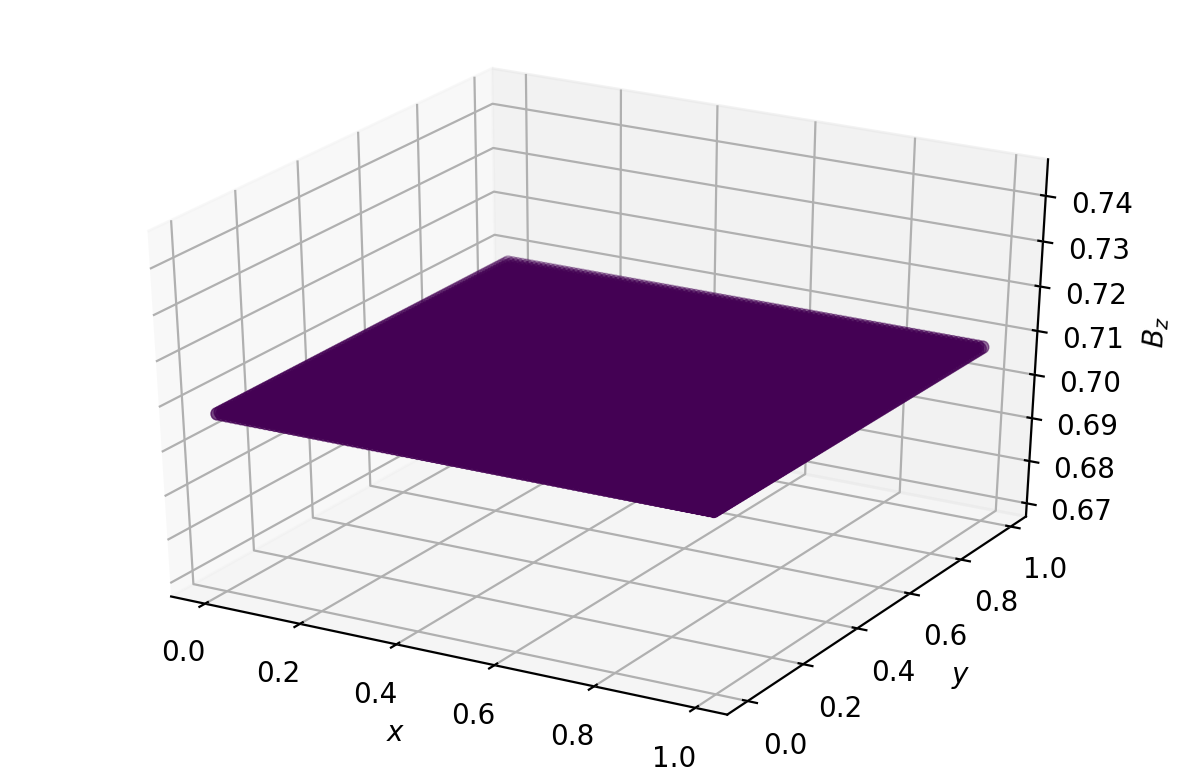

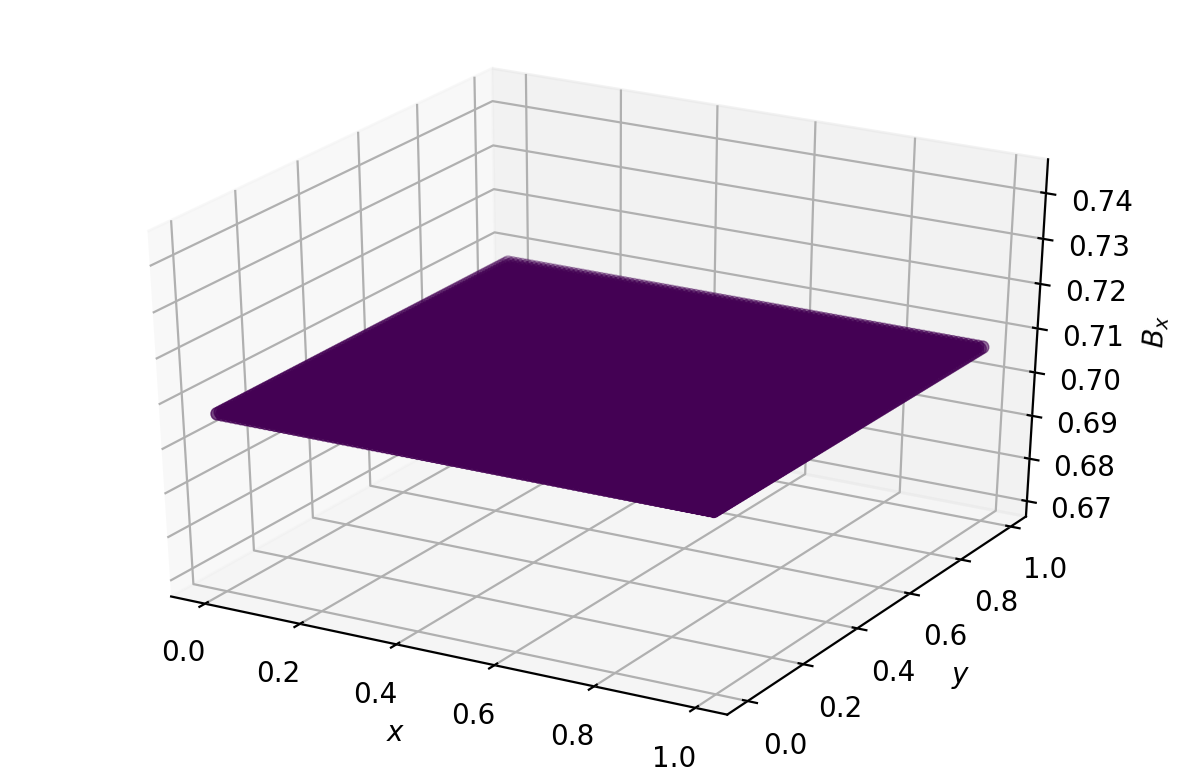

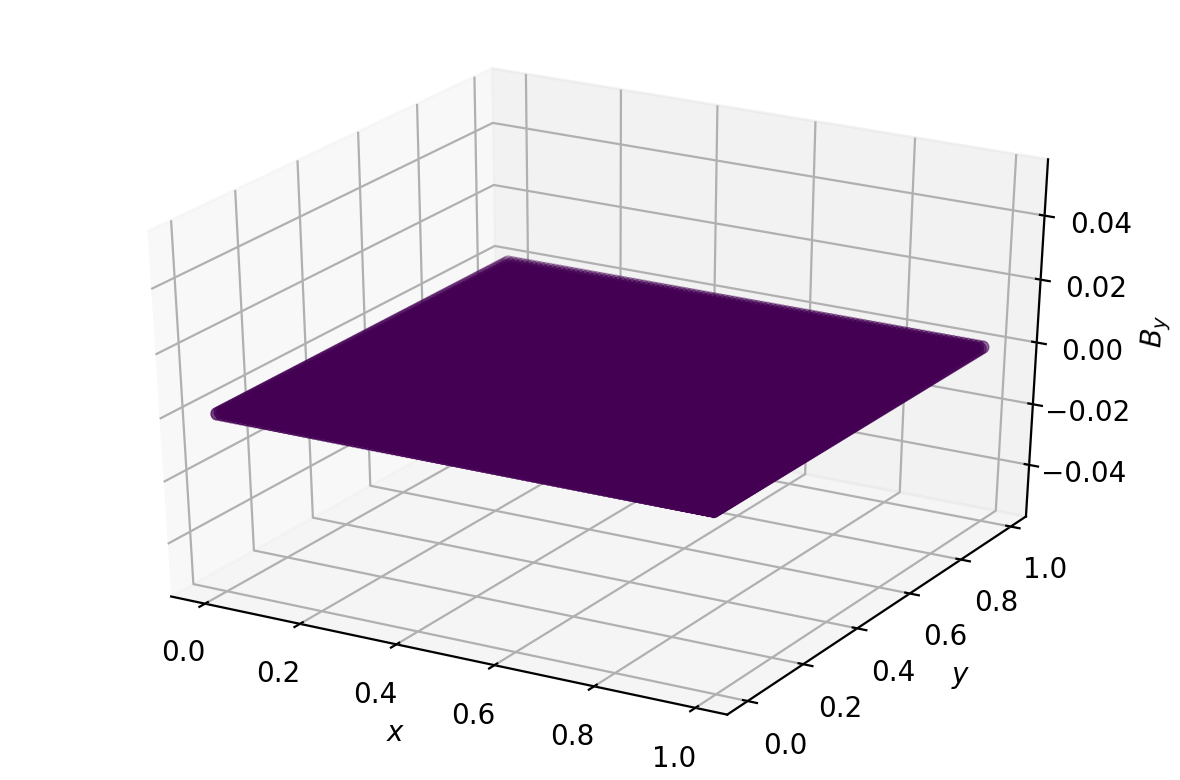

In [27]:
B_dict = load_root(B_dict, 'B0z_rot.out.root')

plot_3D_surf(B_dict, 'B0z_rot.out.root', 'x', 'y', 'Bz')
plot_3D_surf(B_dict, 'B0z_rot.out.root', 'x', 'y', 'Bx')
plot_3D_surf(B_dict, 'B0z_rot.out.root', 'x', 'y', 'By')

This rudimentary example looks correct. We have

$$B_z = \frac{1}{\sqrt{2}},\quad B_x = \frac{1}{\sqrt{2}}, \quad B_y = 0$$

after the rotation by $\frac{\pi}{4}$ about the $y$-axis

# Fields with Uniform Gradients

Uniform gradient fields are controlled by the following $G_{l,m}$ parameters:

\begin{align} 
G_{1,-2}    &=\partial_{y} B_{x}=\partial_{x} B_{y}  \label{eq:G1n2}\\
G_{1,-1}    &=\partial_{y} B_{z}=\partial_{z} B_{y} \\ 
G_{1,0}     &=\partial_{z} B_{z}=-\partial_{x} B_{x}-\partial_{y} B_{y} \\ 
G_{1,1}     &=\partial_{x} B_{z}=\partial_{z} B_{x} \\ 
G_{1,2}     &=\frac{1}{2}\left(\partial_{x} B_{x}-\partial_{y} B_{y}\right) 
\end{align}

Now I'll add a gradient in $B_z$ (and in $B_x$ and $B_y$ as well) by making $G_{1,0}$ non-zero. This time, instead of using the flat x-y plane, I'll use the following plane (see the immediate plot below for a visualization of that plane):

```bash
BCutPlane 0 0 0  1 0 0  0 1 1  100 100
```

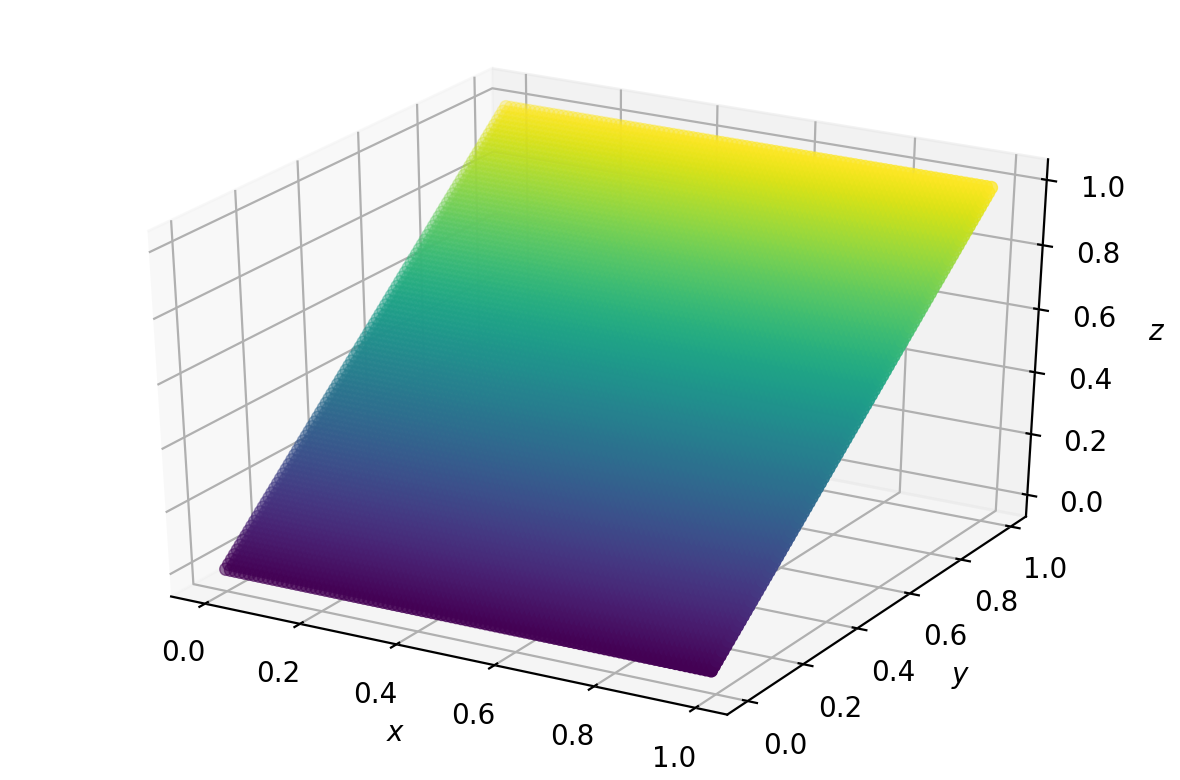

In [28]:
B_dict = load_root(B_dict, 'B0z_G10.out.root')
plot_3D_surf(B_dict, 'B0z_G10.out.root', 'x', 'y', 'z')

The colour map is meaningless here, it just happens to be linked to whatever is plotted on the $z$ axis.

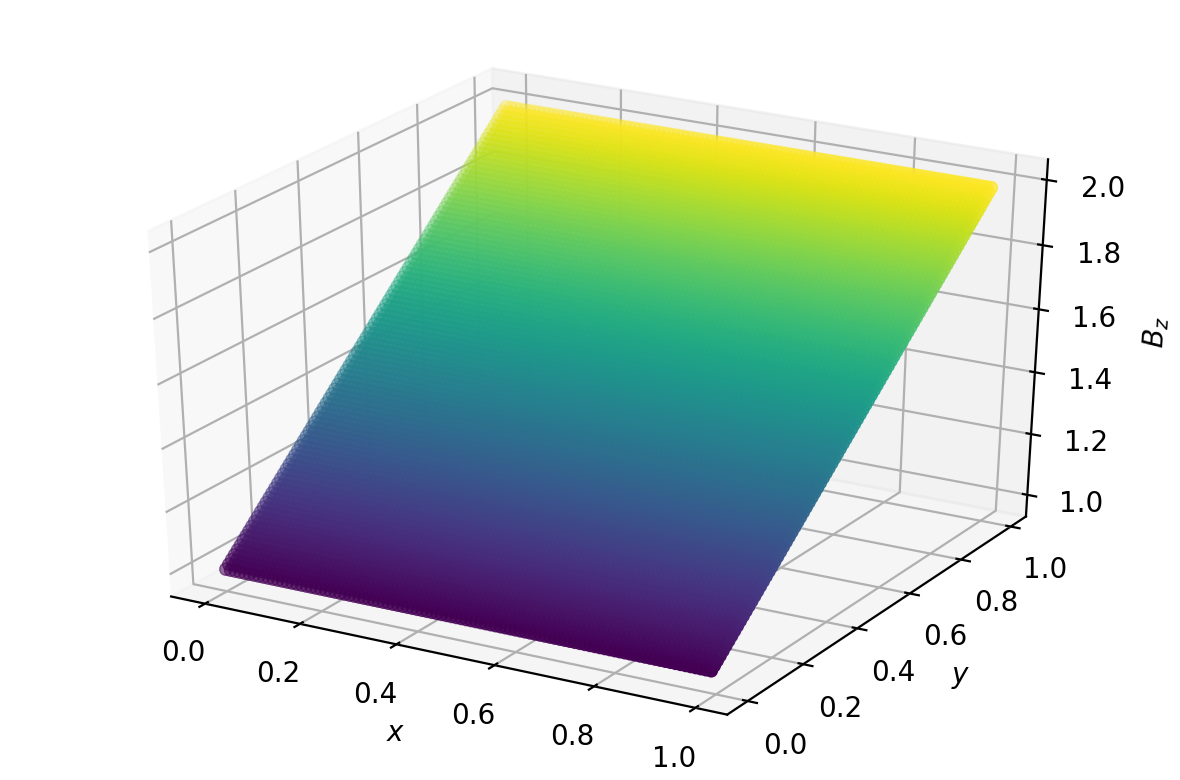

In [29]:
plot_3D_surf(B_dict, 'B0z_G10.out.root', 'x', 'y', 'Bz')

We can see that the uniform gradient in the plot above is as expected. 

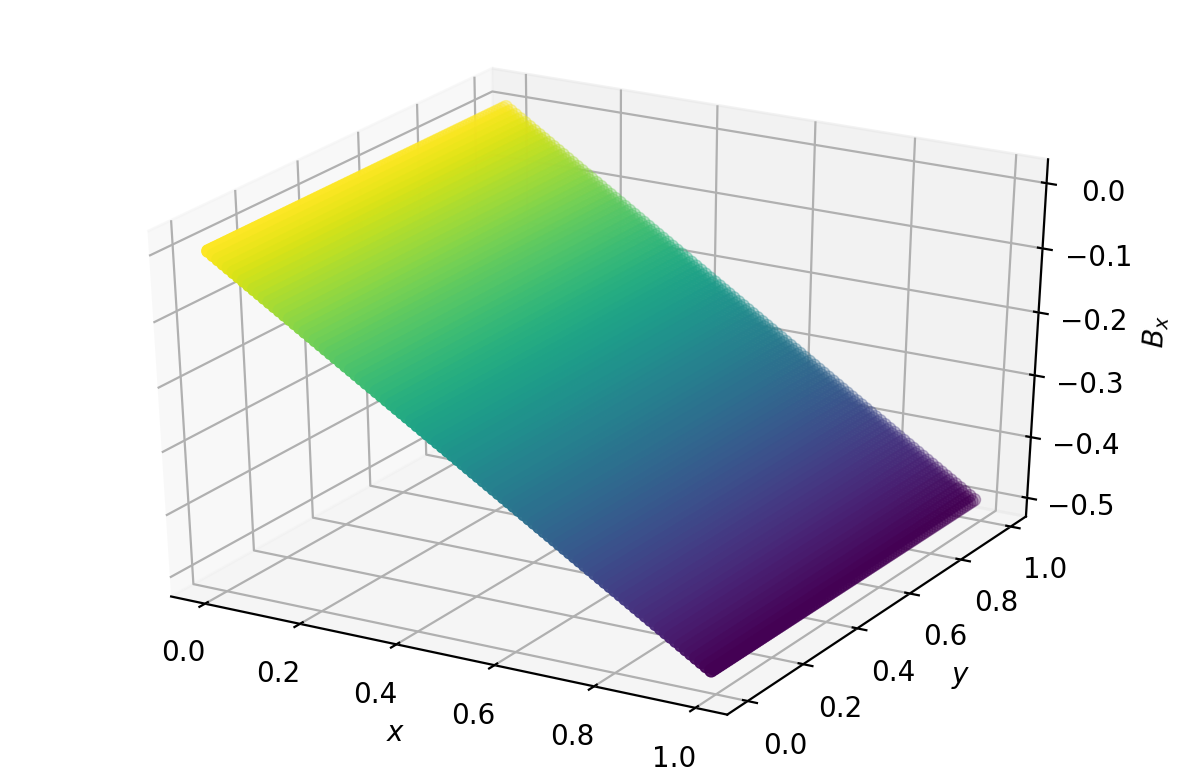

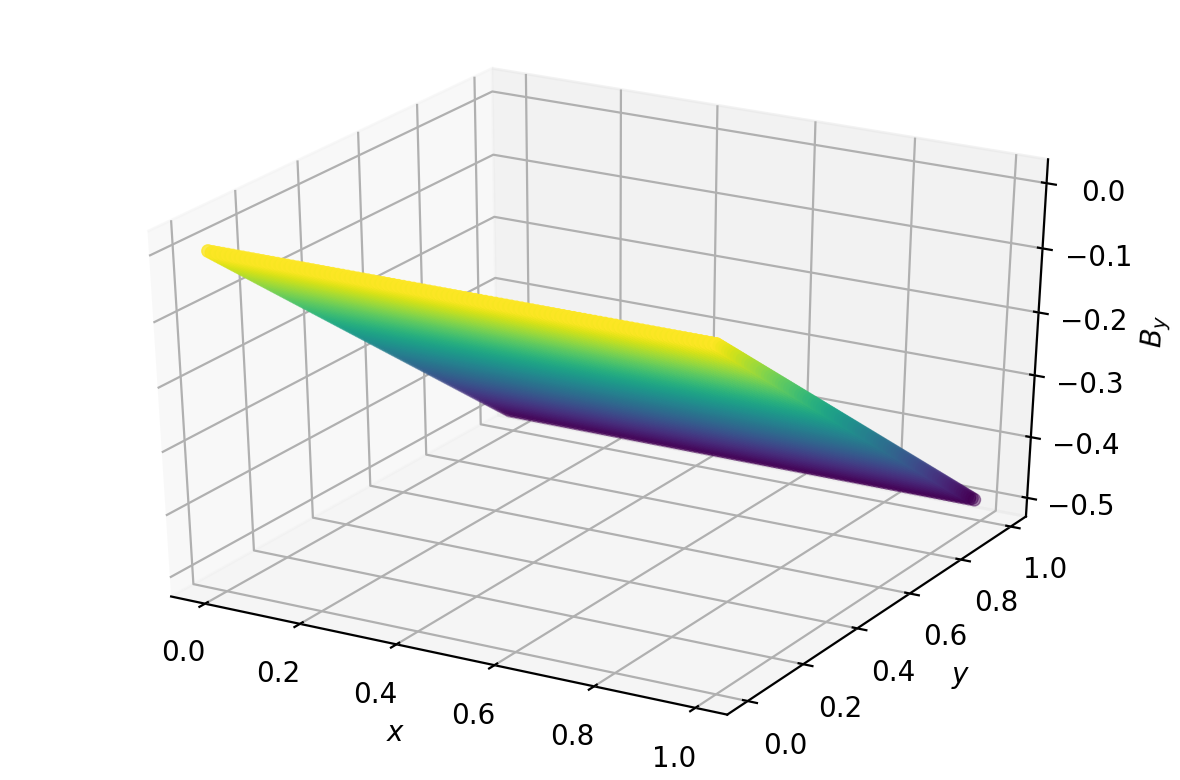

In [30]:
plot_3D_surf(B_dict, 'B0z_G10.out.root', 'x', 'y', 'Bx')
plot_3D_surf(B_dict, 'B0z_G10.out.root', 'x', 'y', 'By')

And this is also consistent with the relationships among uniform gradients, as given above.

# Offsets and Rotating of Fields with Uniform Gradients

We'll use the same plane and field as the above section.

## Offsetting a Field with Uniform Gradients

The offset is a simple $+1$ in the z-direction.

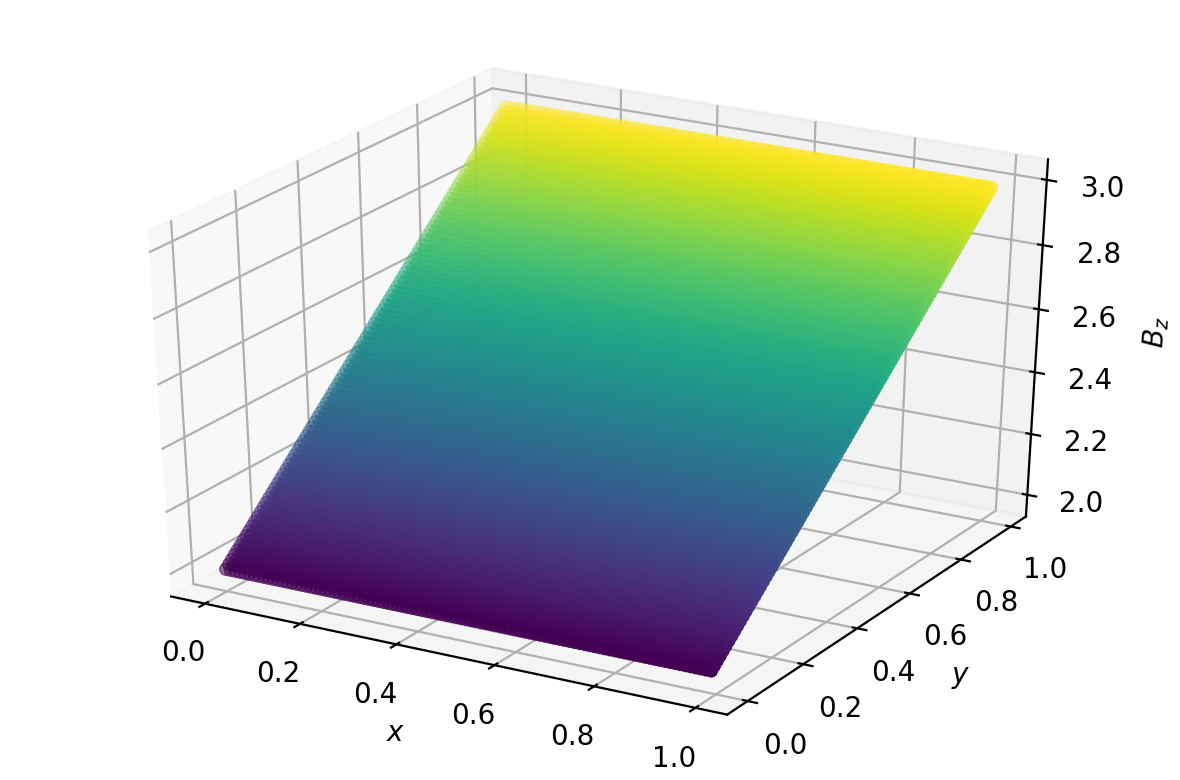

In [31]:
B_dict = load_root(B_dict, 'B0z_G10_off.out.root')
plot_3D_surf(B_dict, 'B0z_G10_off.out.root', 'x', 'y', 'Bz')

## Rotating a Field with Uniform Gradients

When we rotate a field in 3D space, we expect the gradient vectors to rotate appropriately as well. Here we'll apply a $\pi/2$ rotation about the $y$-axis.

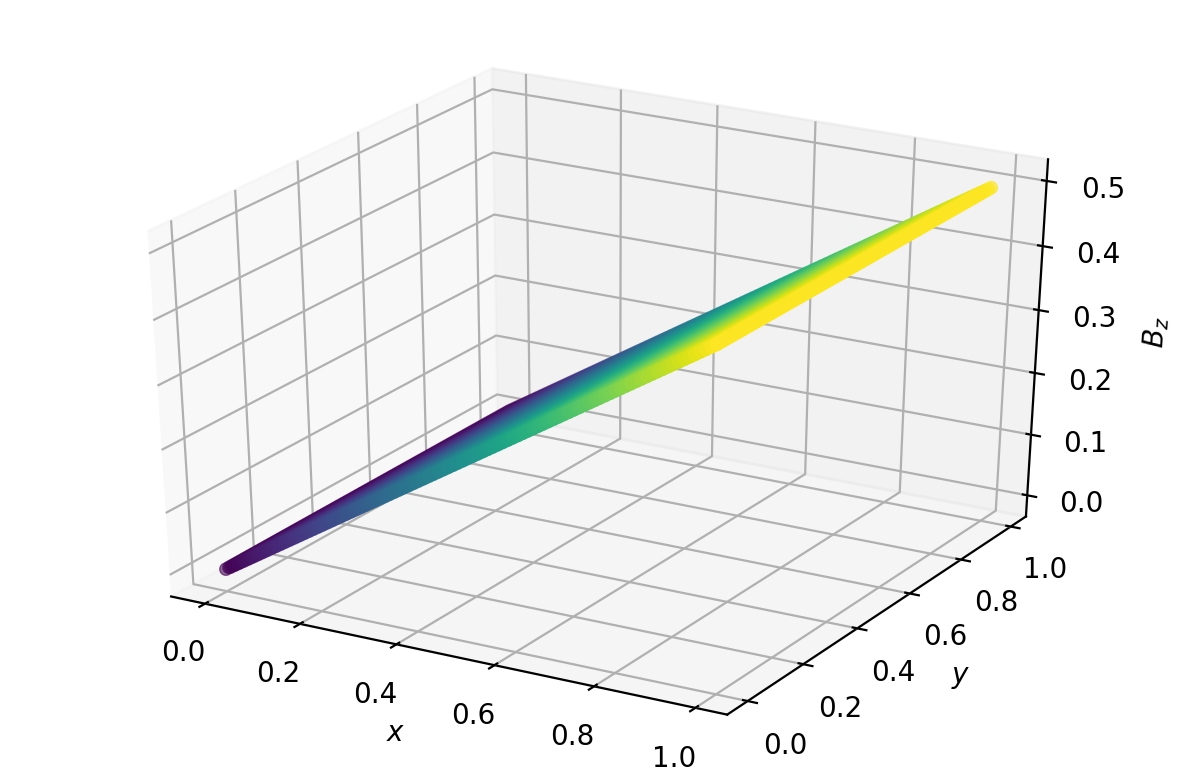

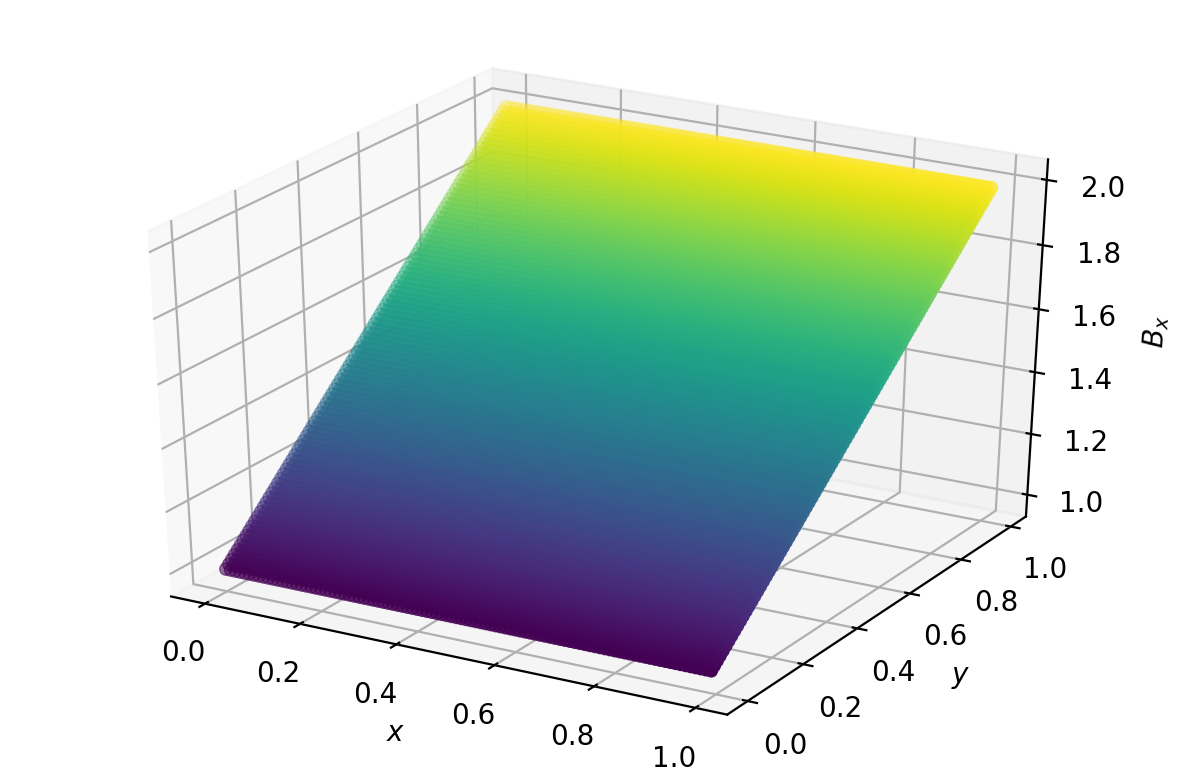

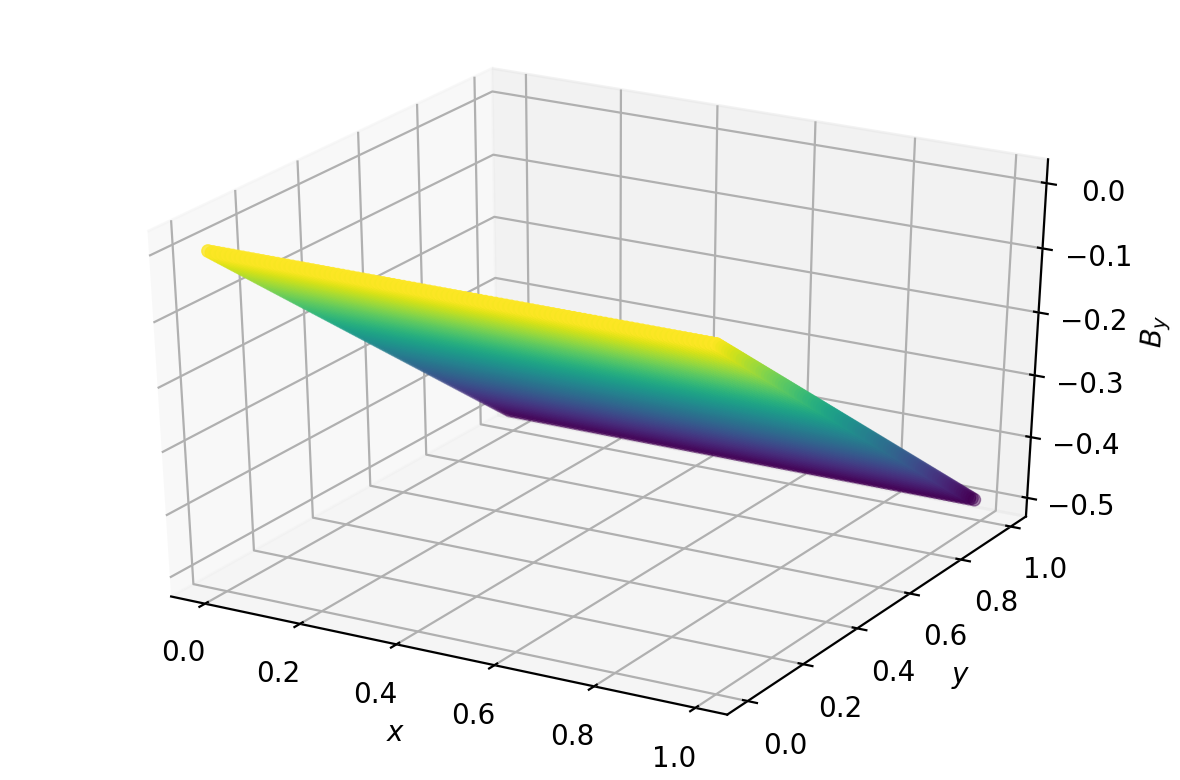

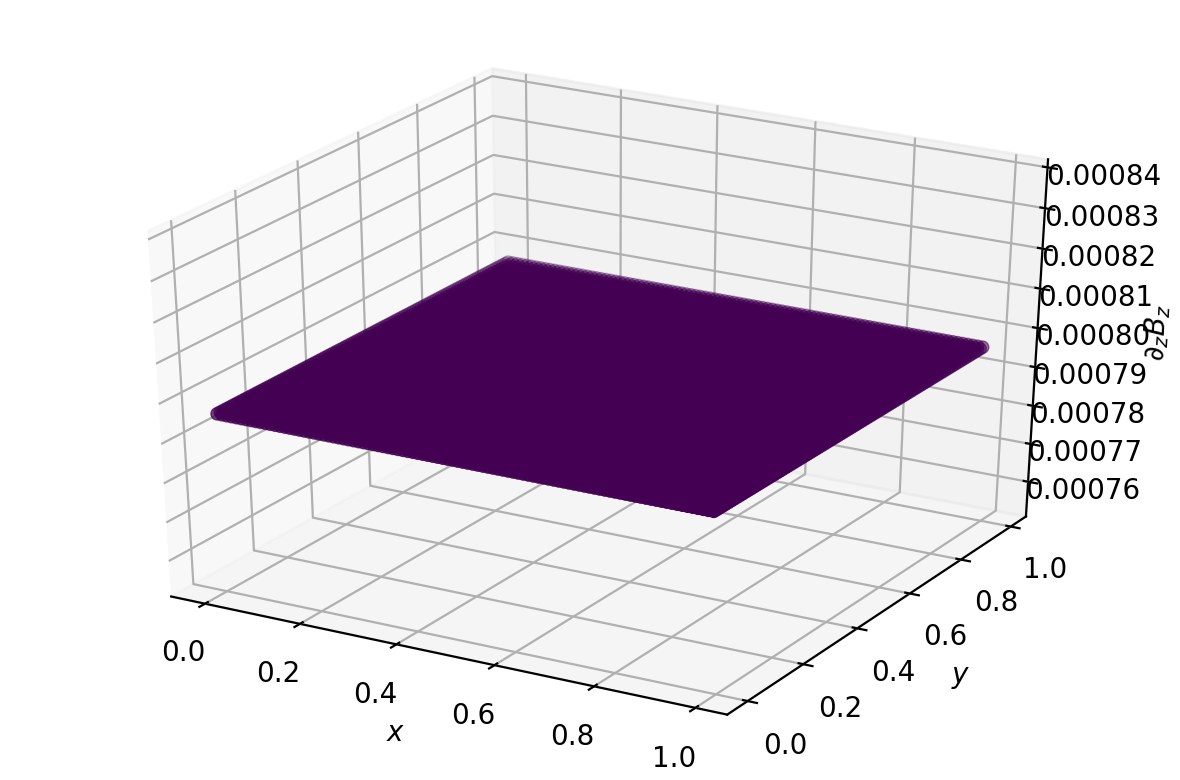

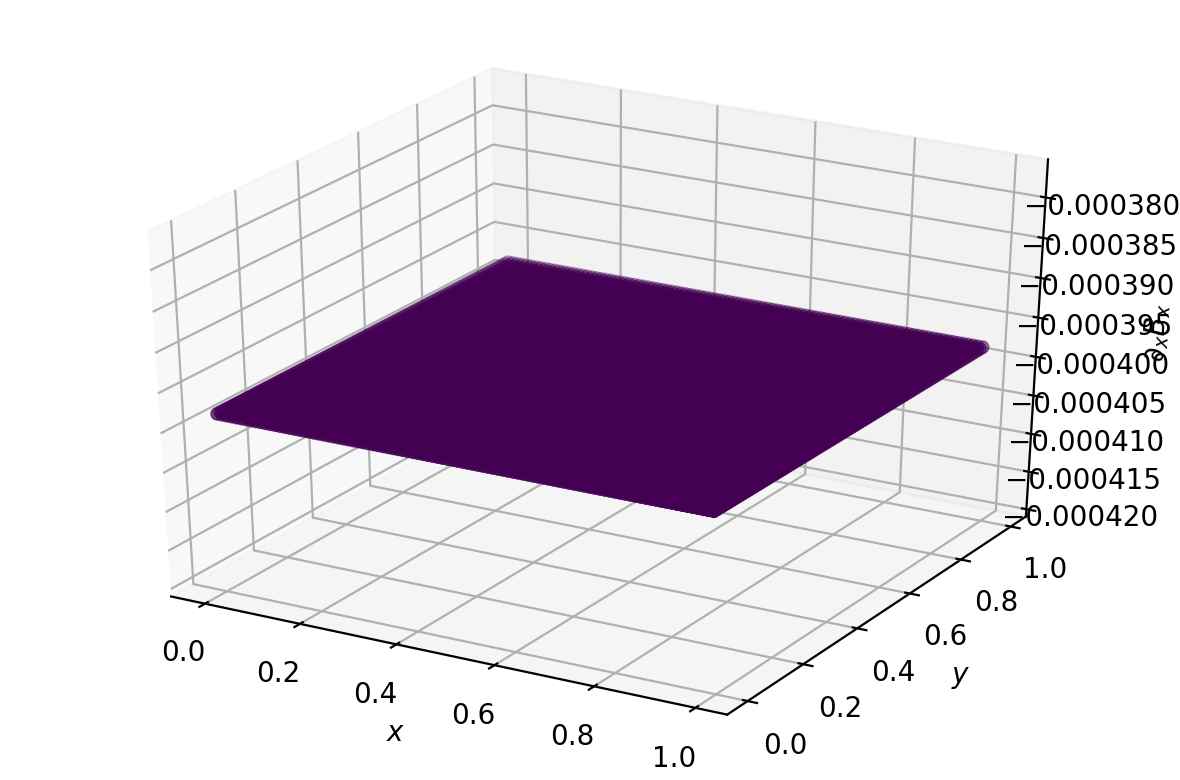

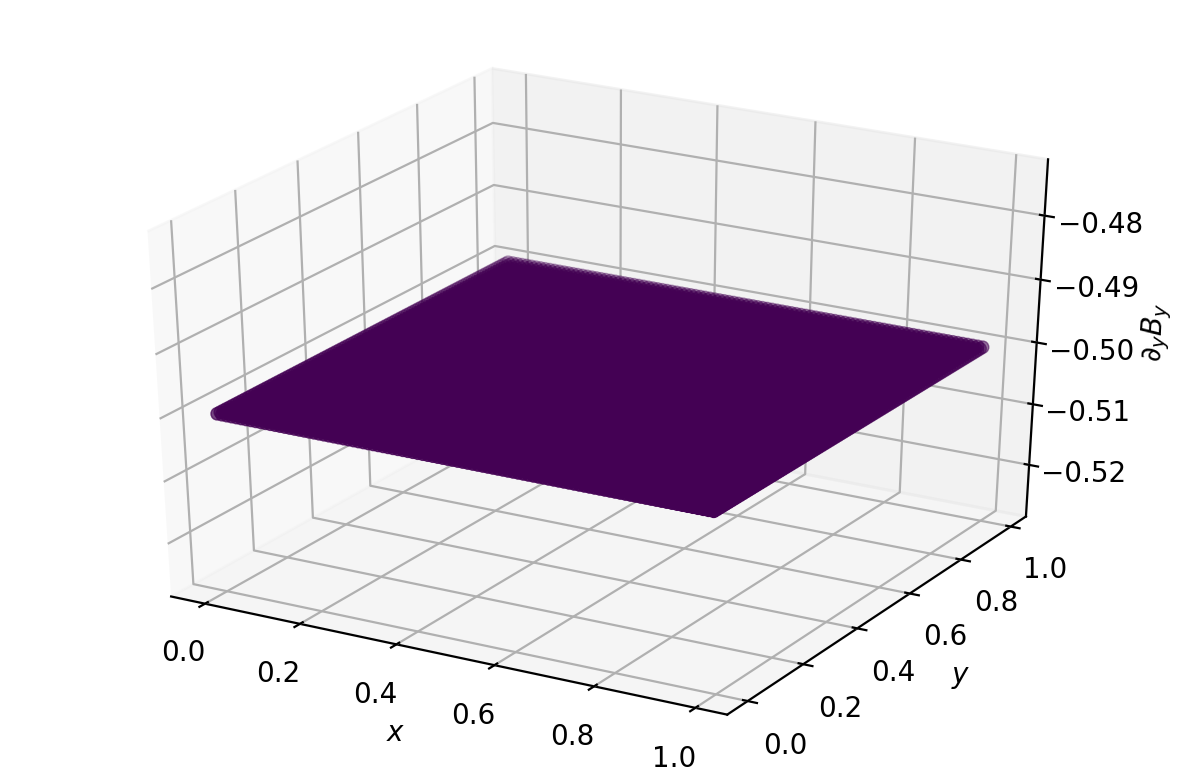

In [32]:
B_dict = load_root(B_dict, 'B0z_G10_rot.out.root')
plot_3D_surf(B_dict, 'B0z_G10_rot.out.root', 'x', 'y', 'Bz')
plot_3D_surf(B_dict, 'B0z_G10_rot.out.root', 'x', 'y', 'Bx')
plot_3D_surf(B_dict, 'B0z_G10_rot.out.root', 'x', 'y', 'By')
plot_3D_surf(B_dict, 'B0z_G10_rot.out.root', 'x', 'y', 'dBzdz')
plot_3D_surf(B_dict, 'B0z_G10_rot.out.root', 'x', 'y', 'dBxdx')
plot_3D_surf(B_dict, 'B0z_G10_rot.out.root', 'x', 'y', 'dBydy')

# Comparison of Results with the `edmfields` Class

The `edmfields` class is able to simulate fields a simple $B_0$ field with a gradient along the $z$ direction. It also has an implementation that allows for rotations. We can compare these simple cases to the `harmonicfields` class to confirm the results.

## `harmonicfields` result

We use $B_z = 1$, and $\partial_zB_z = 1$, with a rotation about the $y$-axis of $\pi/2$

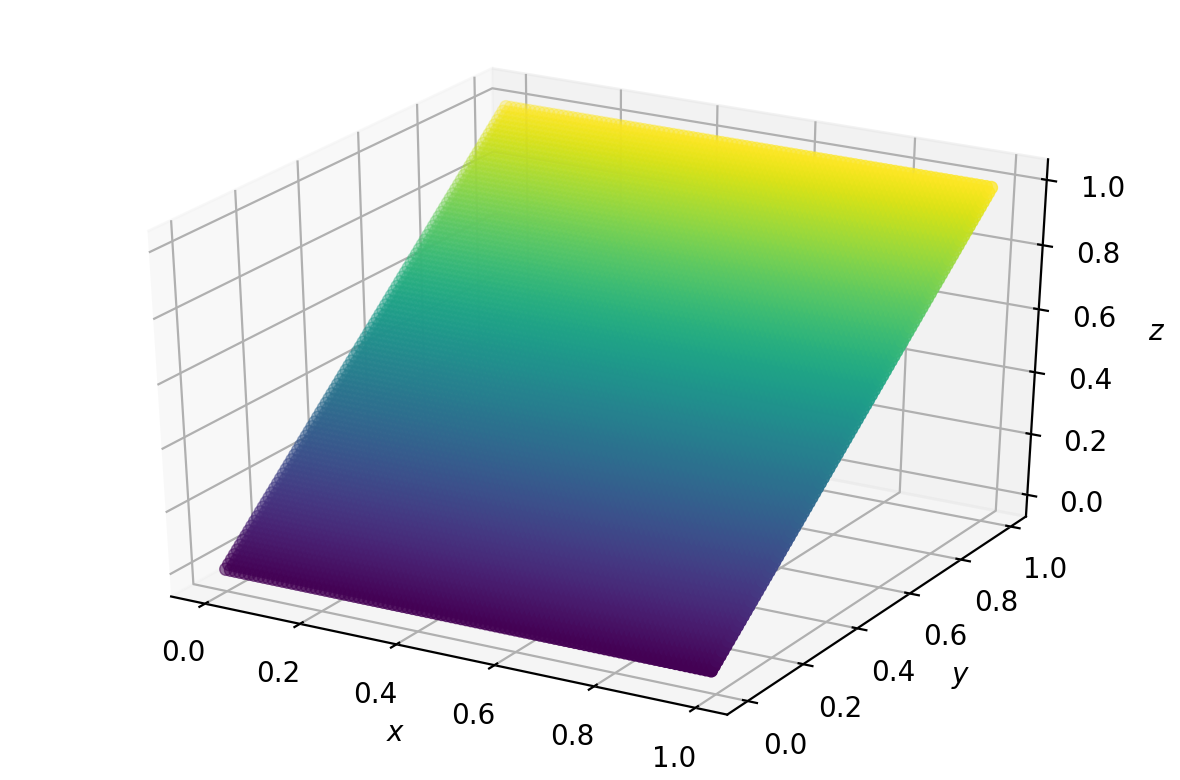

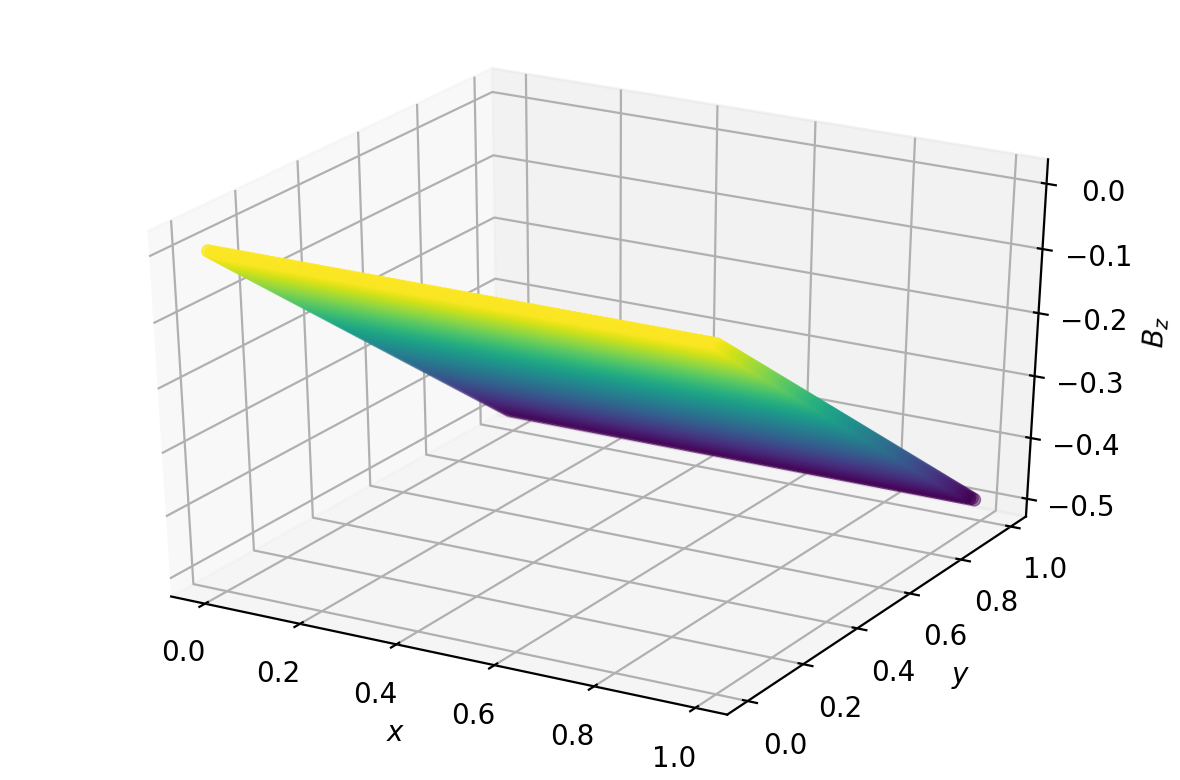

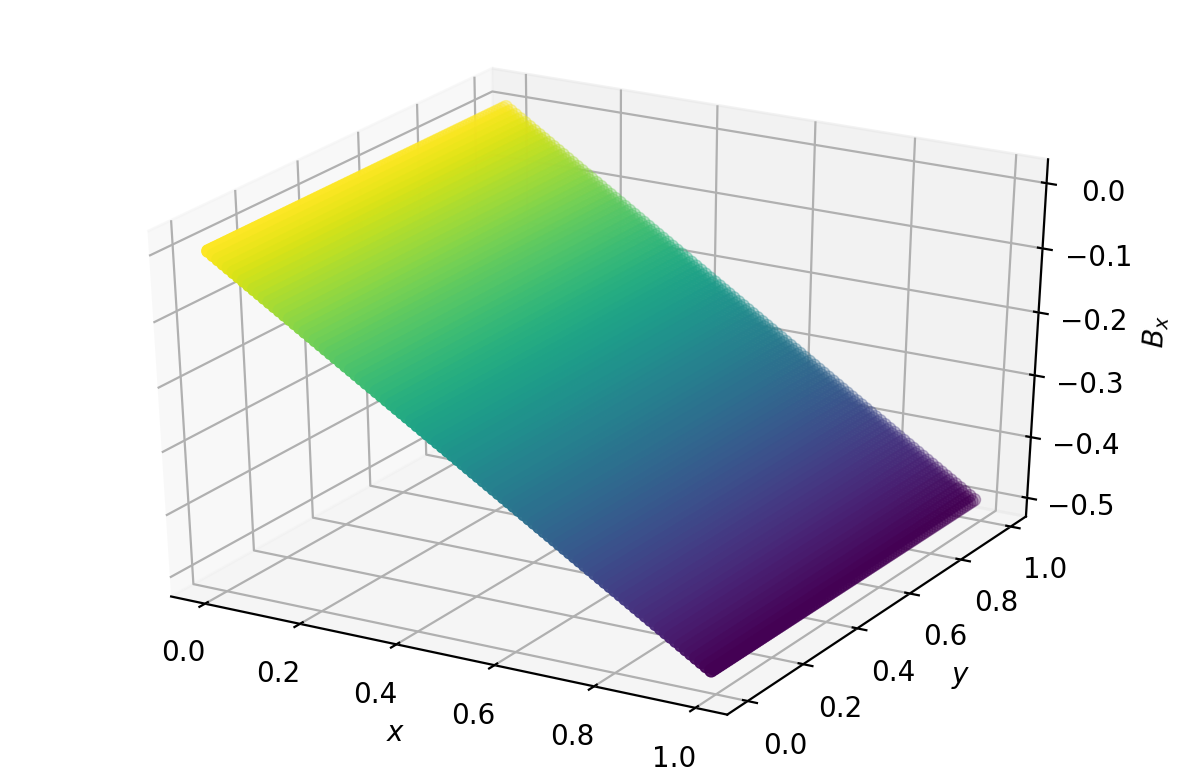

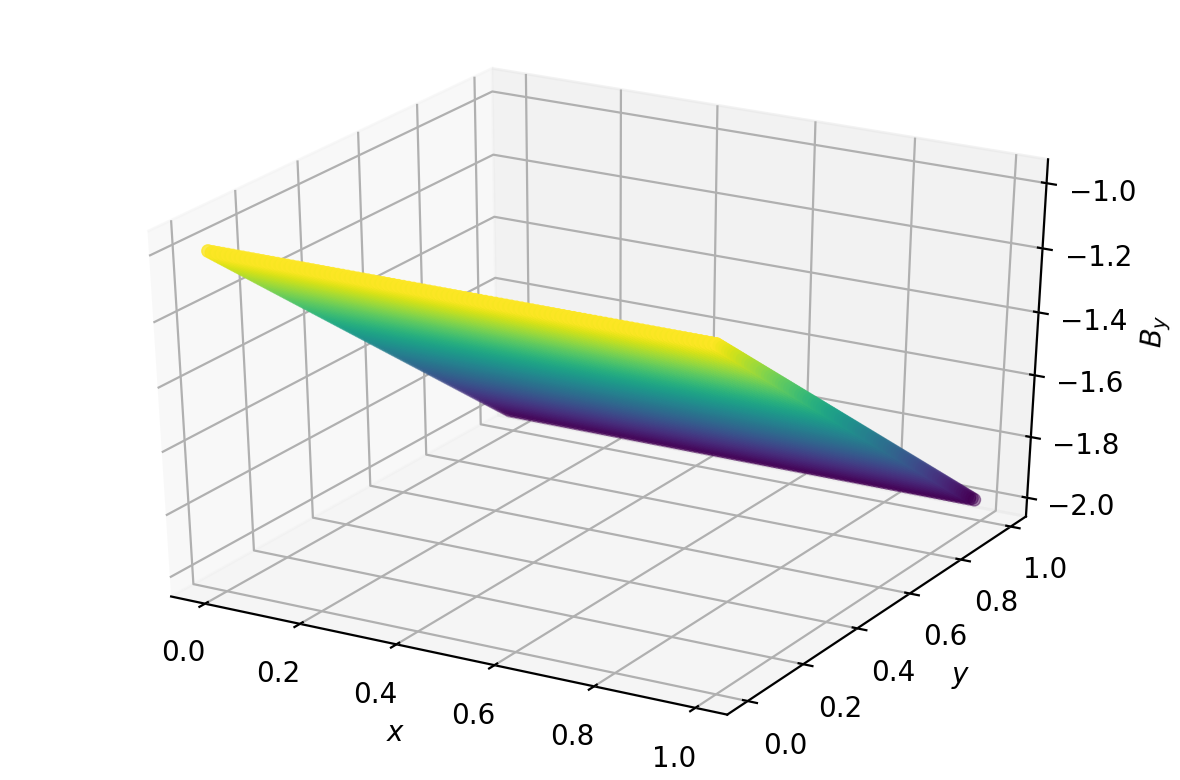

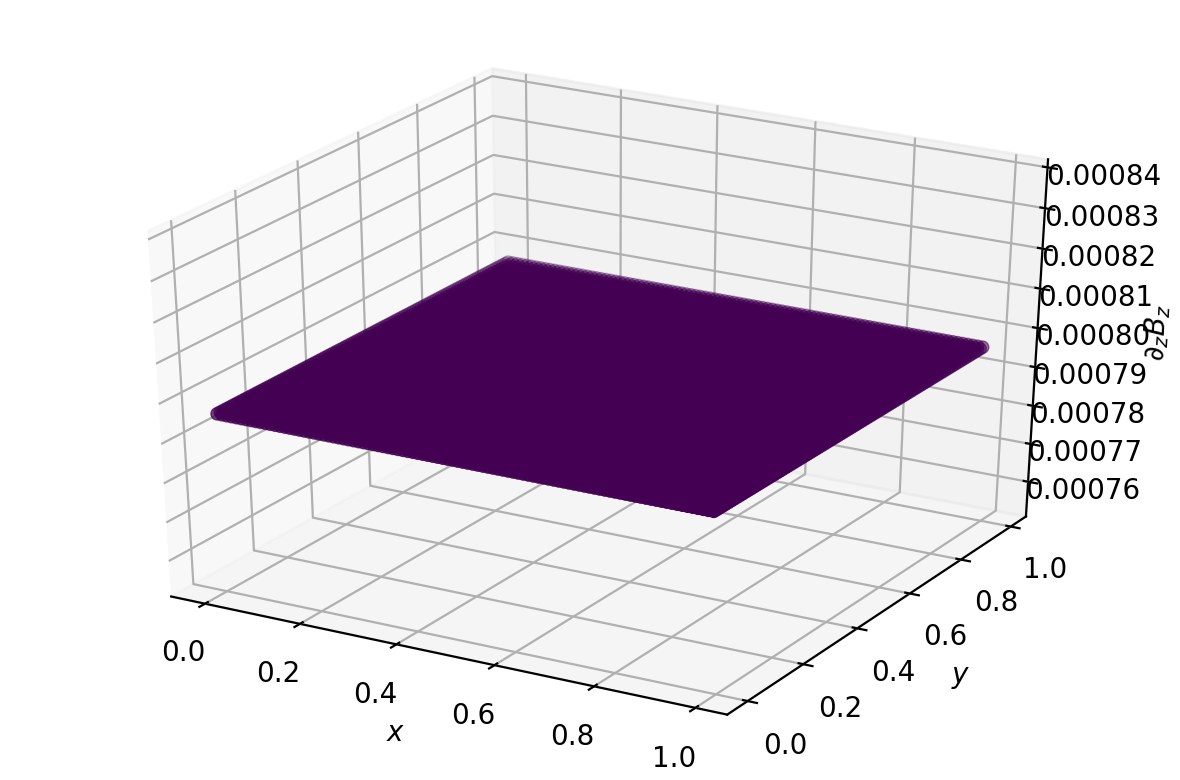

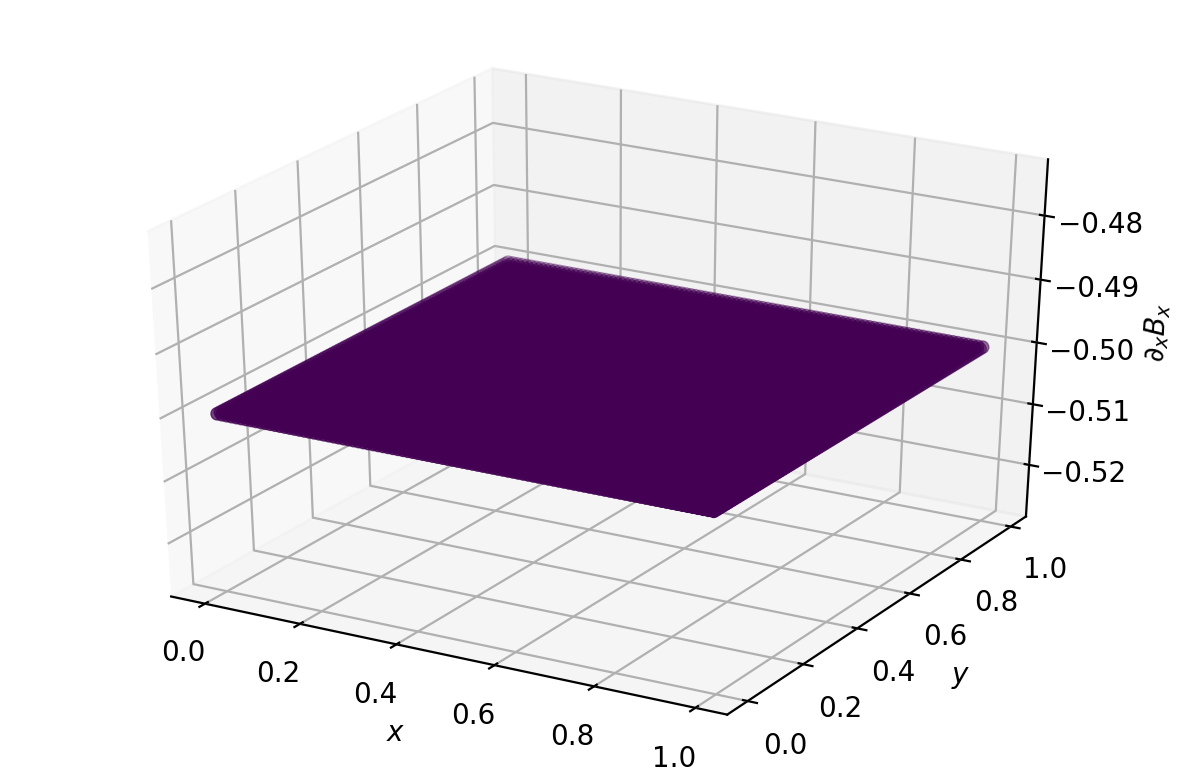

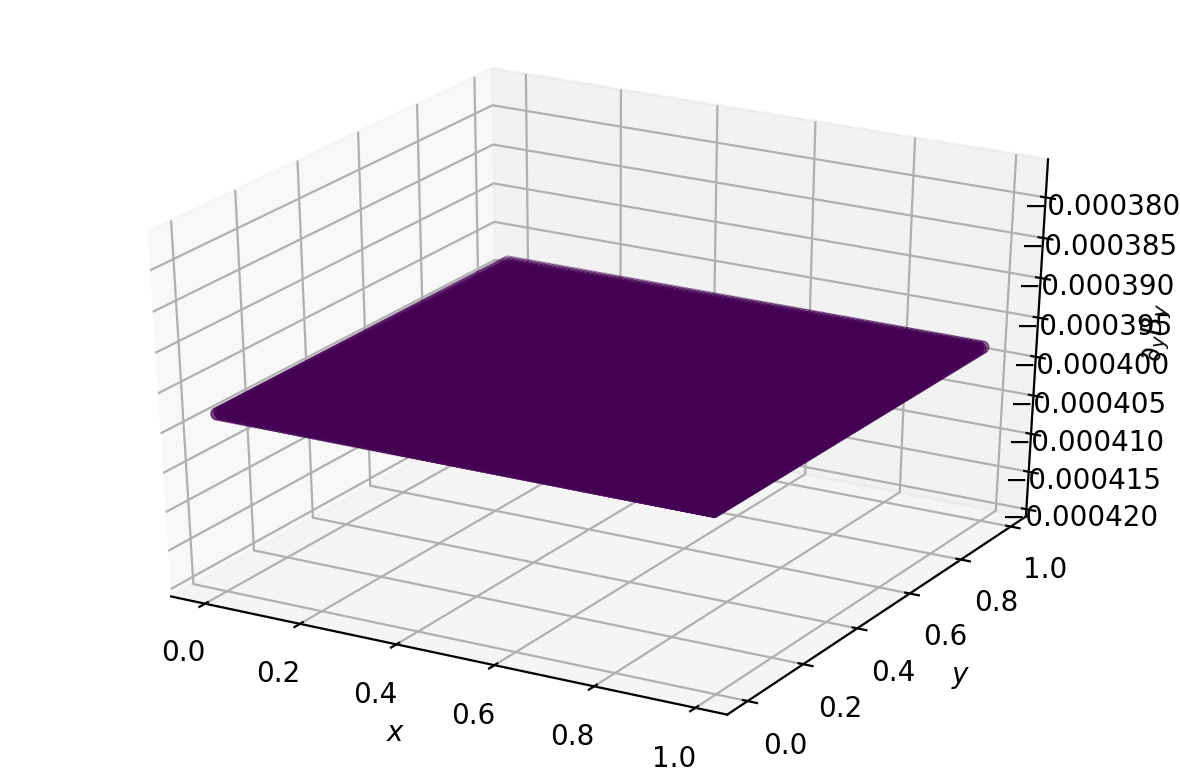

In [38]:
B_dict = load_root(B_dict, 'harm_comp.out.root')
plot_3D_surf(B_dict, 'harm_comp.out.root', 'x', 'y', 'z')
plot_3D_surf(B_dict, 'harm_comp.out.root', 'x', 'y', 'Bz')
plot_3D_surf(B_dict, 'harm_comp.out.root', 'x', 'y', 'Bx')
plot_3D_surf(B_dict, 'harm_comp.out.root', 'x', 'y', 'By')
plot_3D_surf(B_dict, 'harm_comp.out.root', 'x', 'y', 'dBzdz')
plot_3D_surf(B_dict, 'harm_comp.out.root', 'x', 'y', 'dBxdx')
plot_3D_surf(B_dict, 'harm_comp.out.root', 'x', 'y', 'dBydy')

## `edmfields` result

Using the same parameters as above. However the rotation here is parameterized according to a polar angle and an azimuthal angle, and there isn't any indication in the code as to how to think about this orientation with reference to the existing cartesian axes. 

To determine this, one would need to further investigate how rotations look with `edmfields`. 

# Higher-Order Fields

It's not straightforward to actually test these results, but here are some examples of the kinds of fields created when more $G_{l,m}$ parameters are made non-zero.